# Oware

In [1]:
from Game import Oware

In [2]:
game = Oware(board = [0, 0, 0, 0, 0, 0, 1, 0, 8, 0, 0, 2],
             playerOne = False)

# [0, 0, 0, 0, 0, 0, 1, 0, 8, 0, 0, 2] problem board

In [3]:
print(game.board_render())
print(game.score())
print(game.playerone())

+----+----+----+----+----+----+
|  2 |  0 |  0 |  8 |  0 |  1 |
+----+----+----+----+----+----+
|  0 |  0 |  0 |  0 |  0 |  0 |
+----+----+----+----+----+----+

[0, 0]
False


In [4]:
game.valid_move()

[8, 11]

In [5]:
game.moves()

[]

## Testing a minimax AI

In [6]:
from agent.minimax import _minimax, bestmove

In [73]:
clone = game.clone()
move = bestmove(clone)
print("Idx move :", move)

6
Idx move : 5


In [75]:
# insert 0-11 for board index then run this cell
# index notation is refered from the above table.

move = 9

idx = game.move(move)
print(game.board_render())
print(game.score())
print("Next Turn is Player One :", game.playerone())
print(idx)

+----+----+----+----+----+----+
|  0 |  0 |  1 |  1 |  2 |  1 |
+----+----+----+----+----+----+
|  0 |  0 |  0 |  0 |  0 |  0 |
+----+----+----+----+----+----+

[6, 0]
Next Turn is Player One : False
[6, 0]


In [10]:
idx = game.move(7)

## Game simulator

index notation

|    |    |   |   |   |   |
|----|----|---|---|---|---|
| 11 | 10 | 9 | 8 | 7 | 6 |
| 0  | 1  | 2 | 3 | 4 | 5 |

In [3]:
from Game import Oware
from agent.minimax import bestmove
from random import choice

# clear console stuff
from IPython.display import display, clear_output
import sys

P1 = 0
agent = 0
tie = 0

result = ""
score_dict = {}

test_round = 50


for round in range(test_round):
    playing = True
    oware = Oware()
    
    score_track = []

    while playing:
        
        clear_output(wait=True)
        
        print(f"[Epoch {round + 1: >2}/{test_round: >2}]")

        print(oware.board_render())
        print("P1 Score : ", oware.score()[0], ", AI score : ", oware.score()[1])
        print("Move History : ", oware.moves())
        print("P1 wins: {0: >2}, Tie : {1: >2}, Agent wins : {2: >2}".format(P1, tie, agent))

        if len(oware.valid_move()) != 0:
            if oware.playerone(): # P1 makes a play. (random)
                valid_idx = oware.valid_move()
                move = choice(valid_idx)
                
            else: # Agent makes a play. (Minimax)
                clone = oware.clone()
                move, score = bestmove(clone, weight_h= [0.65647, 0.24793, 0.95775, 0.6028, 0.23072])
                score_track.append(score)
            
            oware.move(move)
            print("Chosen move : ", move)
            print("Move History : ", oware.moves())
        
        else:
            playing = False
        
        sys.stdout.flush()
    
    result += "[Epoch {0: >2}/{1: >2}]\n".format(round + 1, test_round)
    result += "P1 Score : {0: >2}, AI score : {1: >2}\n".format(oware.score()[0], oware.score()[1])
    result += "Move History : {}\n".format(oware.moves())
    result += "Score Track : {}\n\n".format(score_track)
    score = oware.score()
    
    if score[0] > score[1]:
        P1 += 1
    
    if score[0] == score[1]:
        tie += 1
    
    if score[0] < score[1]:
        agent += 1
    
    score_dict[round] = list(score_track)


result += "P1 wins: {0: >2}, Tie : {1: >2}, Agent wins : {2: >2}".format(P1, tie, agent)
print(result)
# print(oware.score())
# print("P1 Score : ", oware.score()[0], ", AI score : ", oware.score()[1])
# print("Move History : ", oware.moves())

with open("result/result_04092023.txt", "w") as f:
    f.write(result)


[Epoch 50/50]
+----+----+----+----+----+----+
|  0 |  0 |  0 |  0 |  0 |  0 |
+----+----+----+----+----+----+
|  0 |  0 |  0 |  0 |  0 |  0 |
+----+----+----+----+----+----+

P1 Score :  25 , AI score :  23
Move History :  [1, 6, 2, 6, 4, 6, 0, 9, 3, 9, 4, 7, 1, 8, 2, 6, 5, 6, 3, 11, 5, 6, 0, 8, 3, 10, 4, 10, 1, 7, 5, 6, 1, 7, 0, 11, 3, 9, 1, 6, 2, 6, 4, 6, 5, 6, 0, 7, 0, 8, 0, 11, 3, 6, 5, 6, 1, 10, 4, 6, 2, 8, 5, 6, 4, 7, 5, 9, 3, 8, 5, 9, 4, 10, 1, 11]
P1 wins: 17, Tie :  1, Agent wins : 31
[Epoch  1/50]
P1 Score : 20, AI score : 28
Move History : [0, 10, 3, 6, 5, 6, 4, 8, 1, 8, 0, 10, 0, 11, 4, 7, 4, 6, 0, 8, 3, 11, 0, 6, 2, 7, 1, 8, 2, 6, 3, 8, 0, 6, 1, 7, 5, 8, 4, 6, 2, 7, 1, 11, 4, 8, 1, 11, 3, 9, 2, 7, 1, 6, 0, 7, 2, 11, 0, 8, 5, 8, 3, 6, 5, 10, 3, 8, 1, 10, 4, 10, 0, 6, 5, 6, 2, 9, 2, 10, 5, 11, 1, 6, 2, 8, 0, 11, 5, 7, 1, 8, 2, 10, 3, 7, 0, 11, 2, 10, 4, 6, 1, 8, 2, 7, 3, 8, 5, 9, 4, 10, 1, 6, 5, 9, 3, 11, 0, 6, 2, 10, 1, 7, 3, 8, 2, 9, 5, 10, 3, 11, 3, 6, 0, 7, 1, 8, 4, 10, 

In [2]:
import json

with open("result/score_03202023_heu_changed_02.json", "w") as file:
    json.dump(score_dict, file, sort_keys=True, indent=4)

# Score plot

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
index = choice(range(test_round))

xaxis = np.array(list(range(len(score_dict[index]))))
yaxis = np.array(score_dict[index])

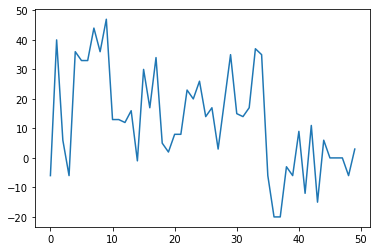

In [18]:
plt.plot(xaxis, yaxis)
plt.show()

## Weight Finder w/ Genetic Algorithm

In [1]:
import numpy as np
import random

In [2]:
weight = np.random.random(1000)
weight_2 = [round(random.random(), 5) for _ in range(1000)]

In [12]:
set = [[],
       []]

In [17]:
set[0].append(random.choices(weight, k = 5))

## Oware Game State Generator

In [1]:
from Game import Oware
from agent.minimax import bestmove
from random import choice ,random

# clear console stuff
from IPython.display import display, clear_output
import sys

In [5]:
random()

0.9714379785616901

In [20]:
P1 = 0
agent = 0
tie = 0

result = ""
state = {}
count = 1


for round in range(3):
    playing = True
    oware = Oware()

    while playing:
        
        clear_output(wait=True)
        
        print(f"[Epoch {round + 1: >2} / 10]")

        print(oware.board_render())
        print("P1 Score : ", oware.score()[0], ", AI score : ", oware.score()[1])
        print("Move History : ", oware.moves())
        
        print("State Collected : ", count - 1 )

        if len(oware.valid_move()) != 0:
            if oware.playerone():
                valid_idx = oware.valid_move()
                move = choice(valid_idx)
            else:
                # clone = oware.clone()
                # move = bestmove(clone)
                valid_idx = oware.valid_move()
                move = choice(valid_idx)
            
            oware.move(move)
            print("Chosen move : ", move)
            print("Move History : ", oware.moves())
        
        else:
            playing = False
            
        rand = random()
        
        if rand > 0.8:
            state[count] = {}
            state[count]["board"] = list(oware.board())
            state[count]["score"] = list(oware.score())
            state[count]["playerOneTurn"] = oware.playerone()
            state[count]["moves"] = list(oware.moves())
            
            count += 1
        
        sys.stdout.flush()
    
    result += "[Epoch {0: >2} /10]\n".format(round + 1)
    result += "P1 Score : {0: >2}, AI score : {1: >2}\n".format(oware.score()[0], oware.score()[1])
    result += "Move History : {}\n\n".format(oware.moves())
    score = oware.score()
    
    if score[0] > score[1]:
        P1 += 1
    
    if score[0] == score[1]:
        tie += 1
    
    if score[0] < score[1]:
        agent += 1
    
    print(result)
    


result += "P1 wins: {0: >2}, Tie : {1: >2}, Agent wins : {2: >2}".format(P1, tie, agent)
print(result)

[Epoch  3 / 10]
+----+----+----+----+----+----+
|  0 |  0 |  0 |  0 |  0 |  0 |
+----+----+----+----+----+----+
|  0 |  0 |  0 |  0 |  0 |  0 |
+----+----+----+----+----+----+

P1 Score :  17 , AI score :  31
Move History :  [1, 11, 1, 9, 5, 6, 4, 10, 4, 7, 0, 7, 5, 8, 1, 7, 4, 7, 2, 10, 4, 8, 3, 6, 4, 6, 5, 8, 0, 6, 1, 7, 2, 10, 2, 11, 0, 9, 2, 11, 1, 10, 4, 6, 2, 11, 3, 7, 0, 9, 0, 6, 4, 11, 0, 10, 1, 7, 5, 7, 3, 9, 4, 10, 2, 11, 5, 8]
State Collected :  59
[Epoch  1 /10]
P1 Score : 21, AI score : 27
Move History : [1, 11, 2, 8, 3, 11, 5, 10, 1, 7, 0, 6, 5, 9, 4, 11, 1, 6, 2, 6, 4, 6, 0, 7, 5, 7, 3, 6, 0, 10, 2, 8, 4, 8, 1, 7, 5, 9, 1, 10, 3, 7, 1, 6, 2, 9, 0, 11, 0, 6, 2, 8, 1, 10, 0, 9, 1, 11, 0, 7, 4, 6, 1, 9, 2, 7, 3, 6, 4, 11, 5, 8, 1, 9, 2, 6, 0, 8, 3, 11, 2, 7, 4, 9, 1, 11, 2, 10, 5, 8, 1, 9, 2, 11, 0, 10, 4, 6, 5, 6, 3, 7, 1, 6, 5, 10, 4, 7, 2, 8, 3, 9, 0, 6, 1, 11, 1, 10]

[Epoch  2 /10]
P1 Score : 22, AI score : 26
Move History : [5, 7, 1, 9, 4, 6, 1, 11, 0, 8, 5, 11, 1, 6,

# JSON Export

In [23]:
import json

with open("score.json", "w") as file:
    json.dump(state, file, sort_keys=True, indent=4)